In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split training into train + validation
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create and fit the generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train_new)


In [ ]:
# Train the model using generator and manual validation set
history = model.fit(
    datagen.flow(x_train_new, y_train_new, batch_size=128),
    epochs=10,
    validation_data=(x_val, y_val)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.6676 - loss: 0.9938 - val_accuracy: 0.9757 - val_loss: 0.0840
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9274 - loss: 0.2401 - val_accuracy: 0.9855 - val_loss: 0.0512
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9462 - loss: 0.1782 - val_accuracy: 0.9848 - val_loss: 0.0487
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9573 - loss: 0.1431 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9616 - loss: 0.1258 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9667 - loss: 0.1121 - val_accuracy: 0.9908 - val_loss: 0.0331
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9704 - loss: 0.1030 - val_accuracy: 0.9908 - val_loss: 0.0302
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9735 - loss: 0.0916 - val_accurac

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0258
Test Accuracy: 99.30%


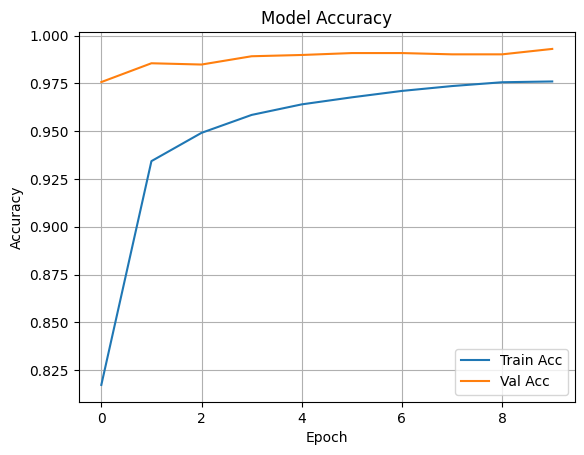

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:

# Instead of saving as .h5 or SavedModel, do this:
model.save("mnist_model.keras")
from google.colab import files
files.download("mnist_model.keras")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls saved_model


assets	fingerprint.pb	saved_model.pb	variables


In [ ]:
model.export("saved_model")  # NOT model.save()


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134681452976400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452978896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452978704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452979664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452979472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452980432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452979280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134681452981584: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!zip -r saved_model.zip saved_model/


  adding: saved_model/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/variables/variables.index (deflated 60%)
  adding: saved_model/saved_model.pb (deflated 84%)


In [ ]:
from google.colab import files
files.download("saved_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

# Load your existing .h5 model
model = tf.keras.models.load_model("mnist_augmented_model.h5")

# Export it as a SavedModel directory
model.save("saved_model")  # This will create a folder called 'saved_model'


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_model.